In [41]:
import pm4py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from notebook.services.config import ConfigManager
cm = ConfigManager().update('notebook', {'limit_output': 20})

In [4]:
log = pm4py.read_xes('data/input-logs/udonya.xes')

/home/sandman/PycharmProjects/apm-assignment-1/venv/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
/home/sandman/PycharmProjects/apm-assignment-1/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|███| 16412/16412 [00:28<00:00, 585.24it/s]
/home/sandman/PycharmProjects/apm-assignment-1/venv/lib/python3.10/site-packages/pm4py/objects/log/util/dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/home/sandman/PycharmProjects/apm-assign

In [29]:
variants = pm4py.get_variants(log)
variants = sorted(variants.items(), key=lambda x: x[1], reverse=True)
variants

variants_info = {}
for index, variant in enumerate(variants):
    variants_info[f"Variant {index}"] = variant[1]

In [67]:
variants_df = pd.DataFrame({'Variant': list(variants_info.keys()), 'Count': list(variants_info.values())})
variants_df['percent'] = (variants_df['Count'] / 
                  variants_df['Count'].sum()) * 100
variants_df.head(40)

,Variant,Count,percent
0,Variant 0,899,5.477699
1,Variant 1,891,5.428954
2,Variant 2,628,3.826468
3,Variant 3,628,3.826468
4,Variant 4,374,2.278820
5,Variant 5,335,2.041189
6,Variant 6,235,1.431879
7,Variant 7,223,1.358762
8,Variant 8,186,1.133317
9,Variant 9,186,1.133317


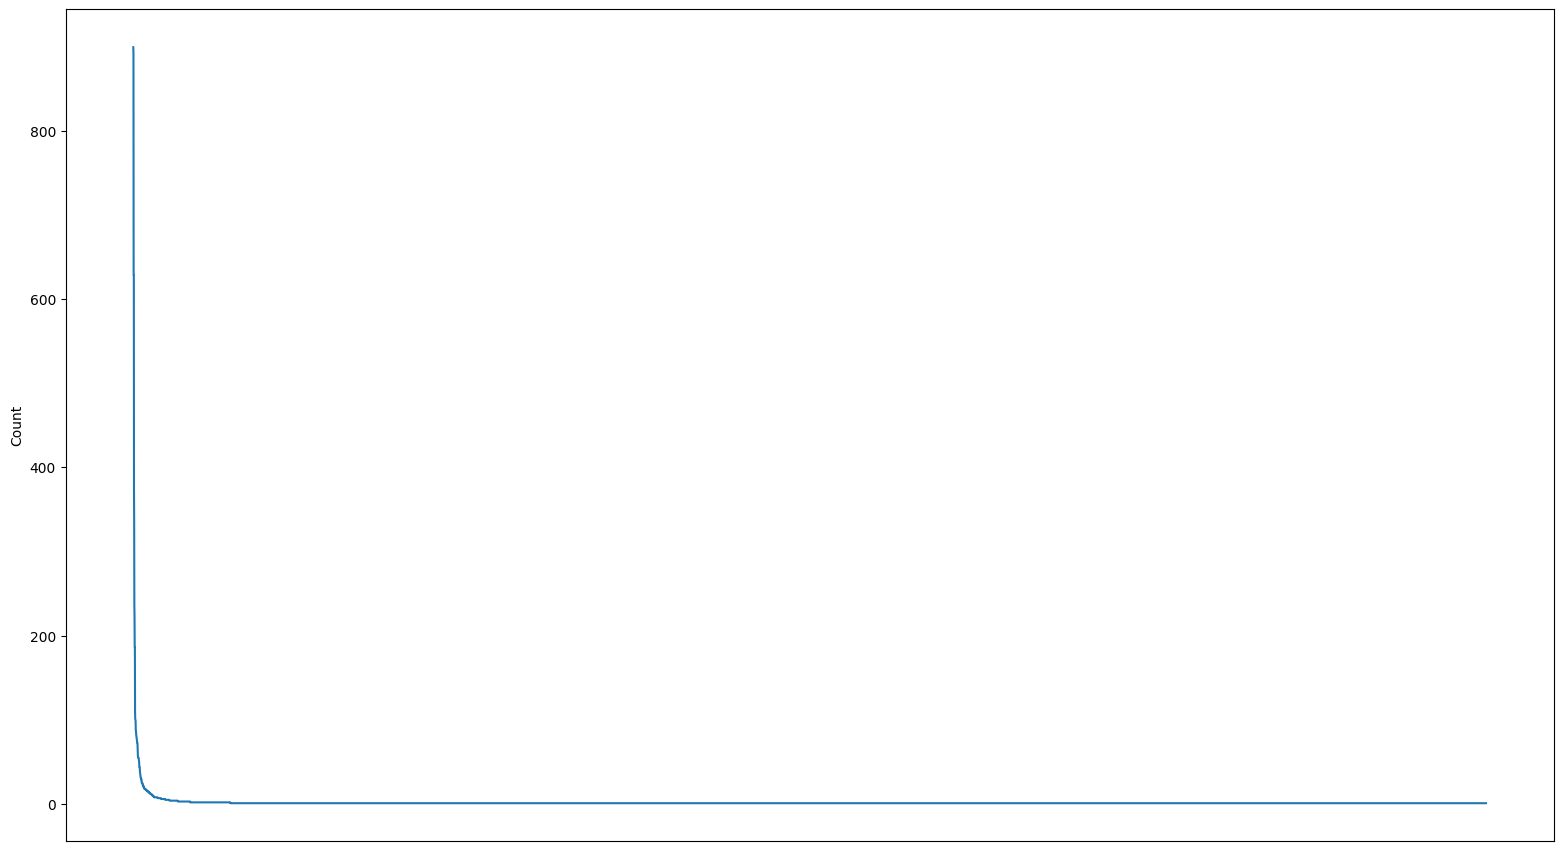

In [77]:
fig, ax = plt.subplots(figsize=(19.2,10.8))
plt.xticks([])
sns.lineplot(data=variants_df, x='Variant', y='Count')
ax.tick_params(axis='x', rotation=90)
# plt.barplot(data=variants_df, x='variant', y='count')
# mylist = [key for key, val in variants_info.items() for _ in range(val)]
# plt.hist(mylist, bins=20)
plt.savefig('variants_distrib.png')